Raw Zeisel UMAP

C:\Users\guang\AppData\Local\Temp\ipykernel_30664\126846719.py:7: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(df2)
C:\Users\guang\anaconda3\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(3005, 10)
0.5 1 0
0.25 0.5 0


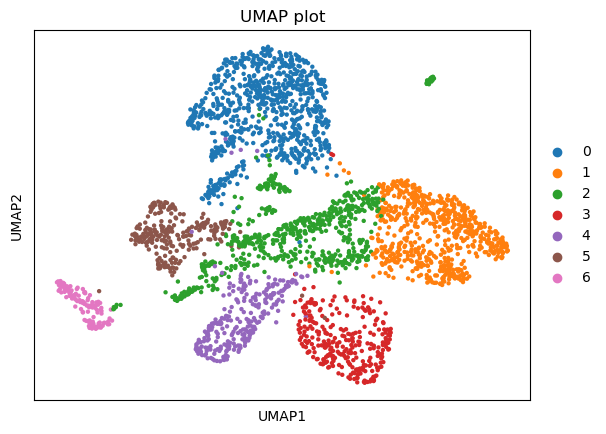

In [1]:
import scanpy as sc
import pandas as pd

# Load the data
df2 = pd.read_csv(r'C:\Users\guang\Desktop\GRN\DeepSEM-master\demo_data\GRN_inference\inputdata\Zeisel.csv')
df2 = df2.iloc[:,1:]
adata = sc.AnnData(df2)

# Compute PCA
sc.tl.pca(adata, svd_solver='arpack', n_comps=10)
print(adata.obsm['X_pca'].shape)

# Compute neighbors based on PCA results
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca')

# Adjust cluster resolution
maxn = 2
minn = 0
x = 1
sc.tl.louvain(adata, resolution=x, random_state=187686)
N = 7

while len(set(adata.obs['louvain'])) != N:
    if len(set(adata.obs['louvain'])) < N:
        minn = x
        x = (maxn + x) / 2
    if len(set(adata.obs['louvain'])) > N:
        maxn = x
        x = (minn + x) / 2
    print(x, maxn, minn)
    sc.tl.louvain(adata, resolution=x, random_state=0)

# Compute and visualize the UMAP representation
sc.tl.umap(adata)
adata.obs['predicted_clusters'] = adata.obs['louvain']

# Visualize and save the UMAP plot as an SVG
sc.pl.umap(adata, color='louvain', title='RAW Zeisel',)


HyperG-VAE Zeisel UMAP

C:\Users\guang\AppData\Local\Temp\ipykernel_30664\2388295815.py:7: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(df2)
C:\Users\guang\anaconda3\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(2944, 10)
0.5 1 0
0.25 0.5 0
0.125 0.25 0
0.1875 0.25 0.125


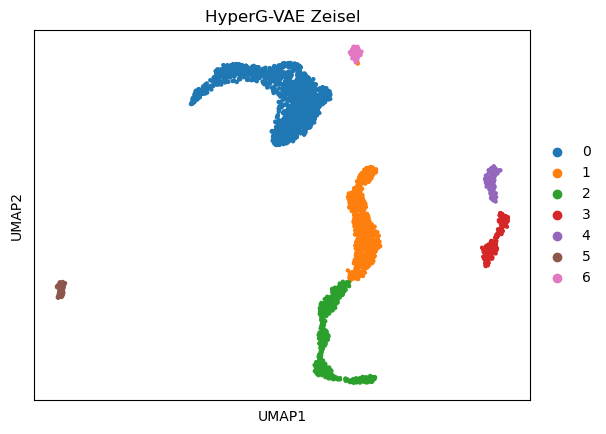

In [ ]:
import scanpy as sc 
import pandas as pd

# Load the data
df2 = pd.read_csv(r'C:\Users\guang\Desktop\GRN\DeepSEM-master\zeisel2\GRN_latent1_zeisel128_alpha_2_beta_1_omega_200_lr_3_wd_1_seed_9_head_8_dropout_0.0_batch_64.csv')
df2 = df2.iloc[:,1:]
adata = sc.AnnData(df2)

# Compute PCA
sc.tl.pca(adata, svd_solver='arpack', n_comps=10)
print(adata.obsm['X_pca'].shape)

# Compute neighbors based on PCA results
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca')

# Adjust cluster resolution
maxn = 2
minn = 0
x = 1
sc.tl.louvain(adata, resolution=x, random_state=2023)
N = 7

while len(set(adata.obs['louvain'])) != N:
    if len(set(adata.obs['louvain'])) < N:
        minn = x
        x = (maxn + x) / 2
    if len(set(adata.obs['louvain'])) > N:
        maxn = x
        x = (minn + x) / 2
    print(x, maxn, minn)
    sc.tl.louvain(adata, resolution=x, random_state=0)

# Compute and visualize the UMAP representation
sc.tl.umap(adata)
adata.obs['predicted_clusters'] = adata.obs['louvain']

# Visualize and save the UMAP plot as an SVG
sc.pl.umap(adata, color='louvain', title='HyperG-VAE Zeisel',)


Cell embedding of bone marrow B cell dataset learned by HyperG-VAE

In [ ]:
df1 = pd.read_csv(r'D:\Jupyter\whole WT Scenic\4\GRN_latent1_WT2LD128_alpha_1_beta_1_omega_1_lr_5_wd_2_seed_9_head_8_dropout_5.0_batch_3552.csv',index_col=0)


In [ ]:
index_df1 =  pd.read_csv(r'C:\Users\guang\Desktop\GRN\DeepSEM-master\data_ids.csv', header=None)
index_df1[0]

In [ ]:
df1.set_index(index_df1[0], inplace=True)

In [ ]:
df1=df1.sort_index()

In [ ]:
import scanpy as sc
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
random_seed = 1
random.seed(random_seed)
np.random.seed(random_seed)

# Load or create your AnnData object for both cases
adata_df1 = sc.AnnData(df1)  # Assuming df1 is already defined

# Preprocessing and normalization
# ... (apply any necessary preprocessing steps here)

# Compute neighborhood graph
sc.pp.neighbors(adata_df1, n_neighbors=35, n_pcs=39)

# Cluster the data using the Louvain algorithm
sc.tl.louvain(adata_df1, resolution=1.2)

# Custom cluster labels mapping
cluster_labels_mapping = {
    '7': 'Pre-Pro B',
    '0': 'Kappa Pre B',
     '1': 'PreBCRd',
     '2': 'PreBCRi',
     '3': 'Mature B',
     '4': 'Pro B',
     '5': 'Immature B',
     '6': 'Lambda Pre B',
     '8': 'High Mitochondrial B',
    '9': 'Plasma'
}

# Apply custom labels to the adata object
adata_df1.obs['cluster_custom'] = adata_df1.obs['louvain'].map(cluster_labels_mapping).astype('category')

# Compute the t-SNE embedding
sc.tl.tsne(adata_df1, random_state=random_seed, n_pcs=38)

# Reorder clusters
desired_order = ['Pre-Pro B', 'Pro B', 'PreBCRd', 'PreBCRi', 'Kappa Pre B',
                 'Lambda Pre B', 'Immature B', 'Mature B', 'High Mitochondrial B', 'Plasma']
adata_df1.obs['cluster_custom'] = pd.Categorical(adata_df1.obs['cluster_custom'], categories=desired_order)

# Define a custom color palette for clusters
cluster_colors = {
    'Pre-Pro B': '#6a0691',
    'Pro B': '#f53ba4',
    'PreBCRd': '#e03828',
    'PreBCRi': '#e0ac28',
    'Kappa Pre B': '#ede76d',
    'Lambda Pre B': '#51cc43',
    'Immature B': '#2fb5b3',
    'Mature B': '#2f48b5',
    'High Mitochondrial B': '#3000f0',
    'Plasma': '#180563'
}

# Plot the t-SNE representation colored by cluster with custom colors
sc.pl.tsne(adata_df1, color=['cluster_custom'], palette=cluster_colors, title='t-SNE plot A', save='rssgeneembed.svg')

# Save the plot as SVG



Gene embedding of bone marrow B cell dataset learned by HyperG-VAE

C:\Users\guang\AppData\Local\Temp\ipykernel_30664\1564752955.py:6: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(df2)
C:\Users\guang\anaconda3\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(2000, 10)
1.5 2 1
1.25 1.5 1
1.125 1.25 1
1.0625 1.125 1


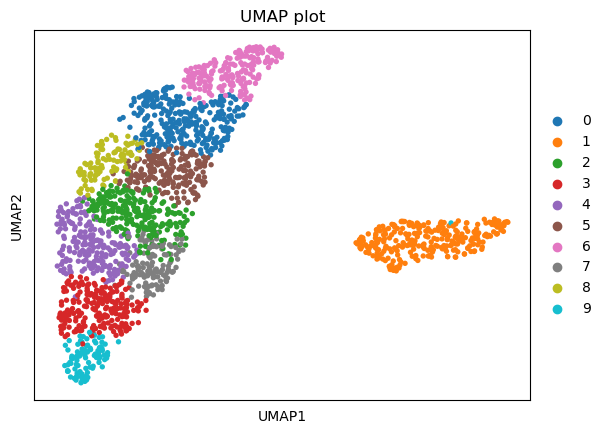

In [10]:
import scanpy as sc
import pandas as pd

# Load the data
df2 = pd.read_csv(r'D:\Jupyter\whole WT Scenic\4\GRN_latent2_WT2LD128_alpha_1_beta_1_omega_1_lr_5_wd_2_seed_9_head_8_dropout_5.0_batch_3552.csv',index_col=0)
adata = sc.AnnData(df2)

# Compute PCA
sc.tl.pca(adata, svd_solver='arpack', n_comps=10)
print(adata.obsm['X_pca'].shape)

# Compute neighbors based on PCA results
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca')

# Adjust cluster resolution
maxn = 2
minn = 0
x = 1
sc.tl.louvain(adata, resolution=x, random_state=187686)
N = 10

while len(set(adata.obs['louvain'])) != N:
    if len(set(adata.obs['louvain'])) < N:
        minn = x
        x = (maxn + x) / 2
    if len(set(adata.obs['louvain'])) > N:
        maxn = x
        x = (minn + x) / 2
    print(x, maxn, minn)
    sc.tl.louvain(adata, resolution=x, random_state=0)

# Compute and visualize the UMAP representation
sc.tl.umap(adata)
adata.obs['predicted_clusters'] = adata.obs['louvain']

# Visualize and save the UMAP plot as an SVG
sc.pl.umap(adata, color='louvain', title='UMAP plot')